In [1]:
import seaborn as sns
df = sns.load_dataset('iris')
import matplotlib.pyplot as plt

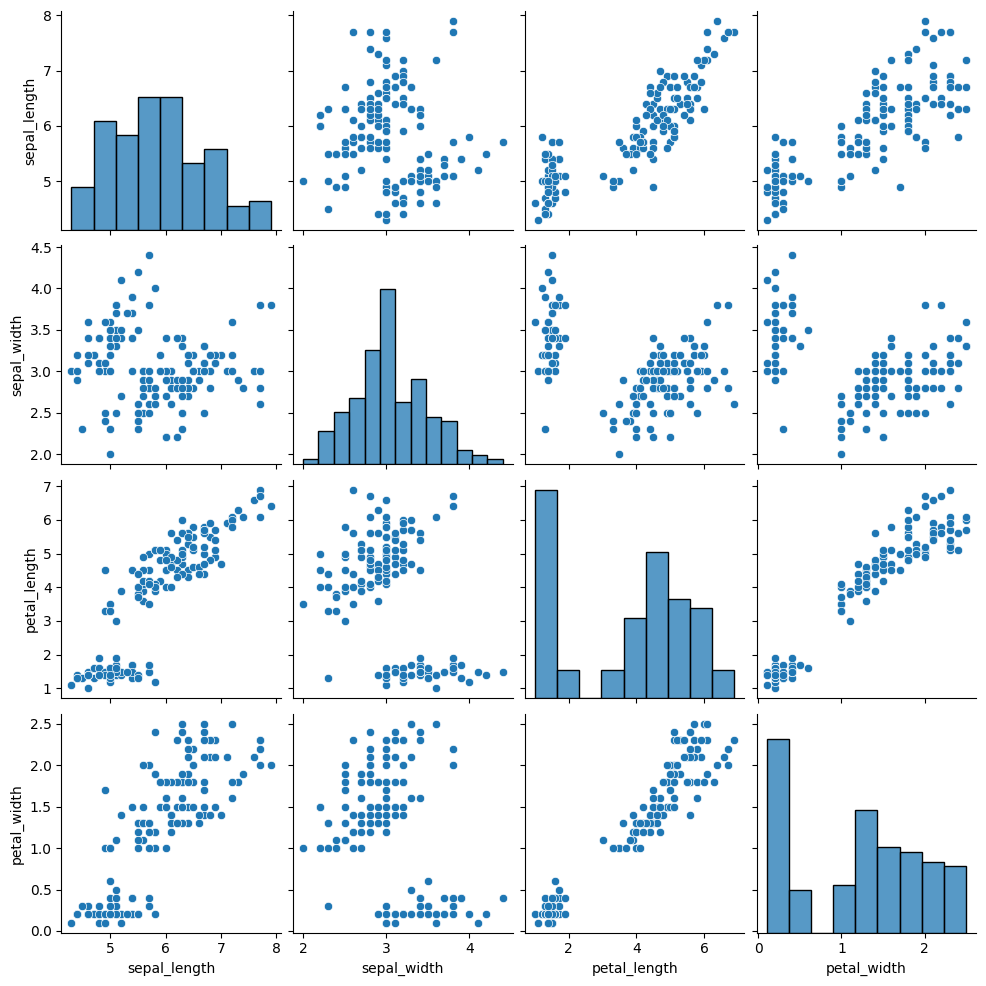

In [3]:
sns.pairplot(df)
plt.show()

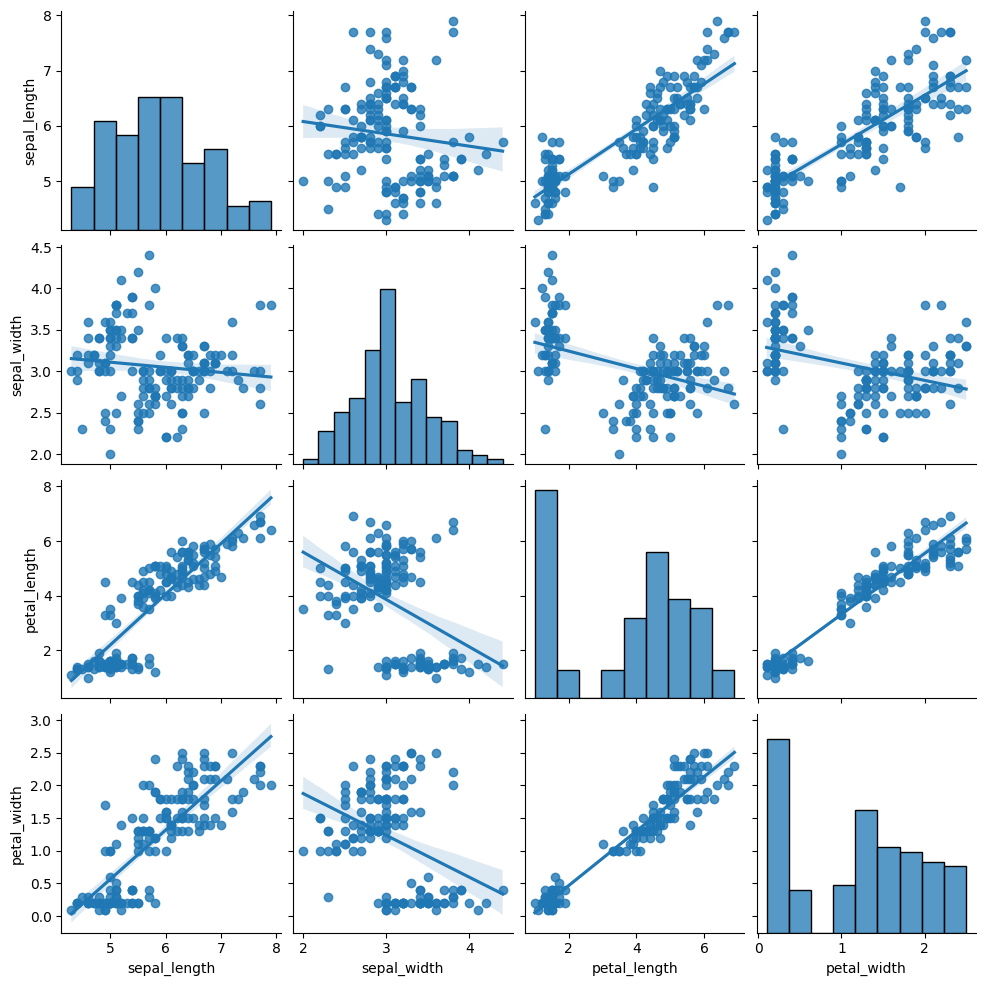

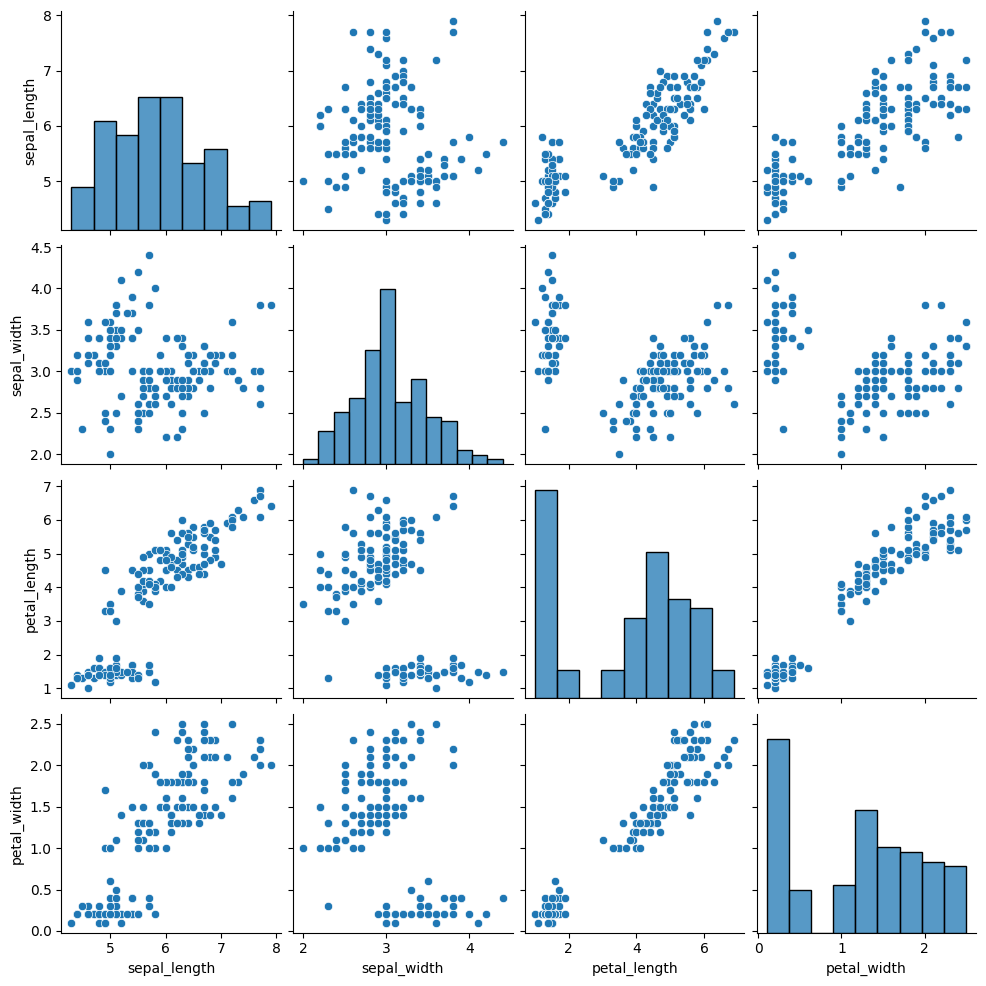

In [4]:
# regression 포함
sns.pairplot(df, kind="reg")
plt.show()
 
# regression 없이
sns.pairplot(df, kind="scatter")
plt.show()

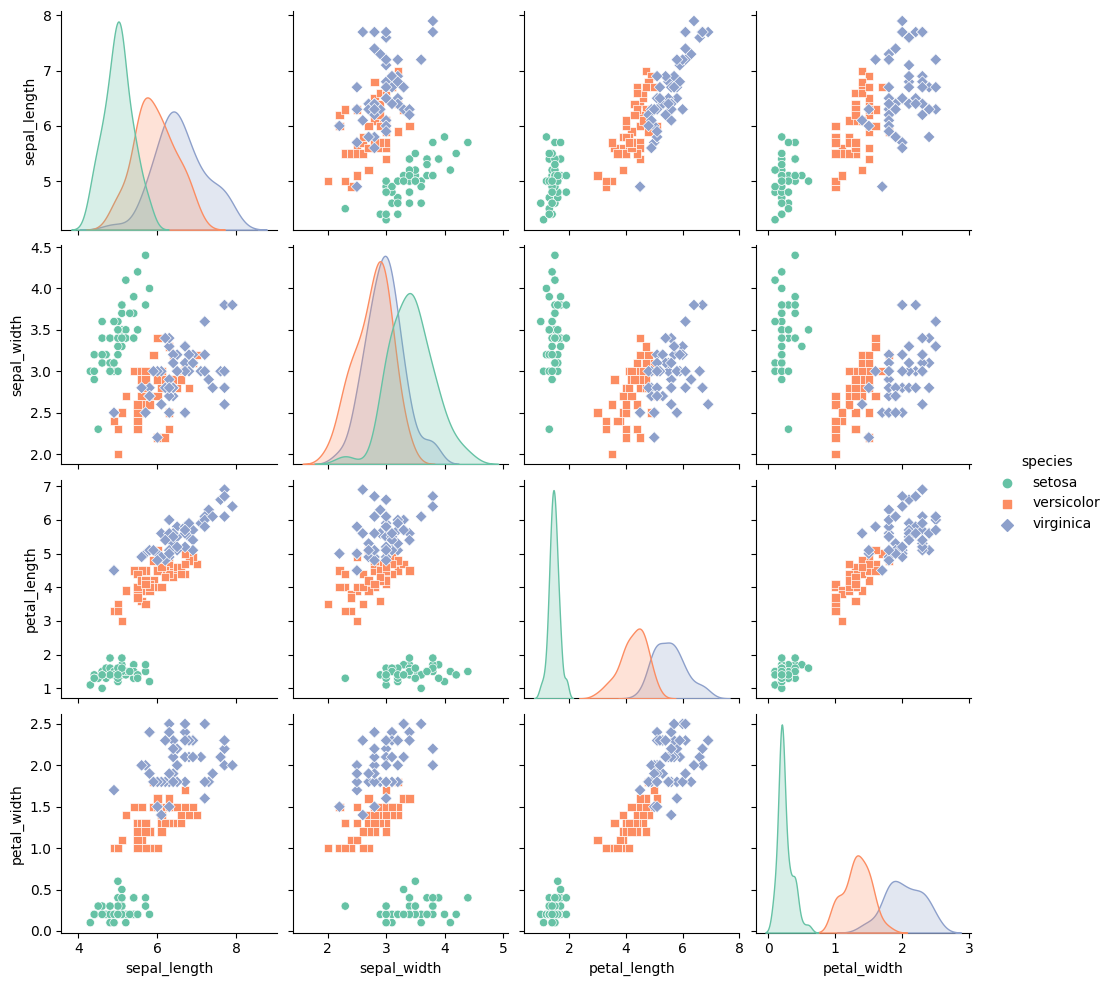

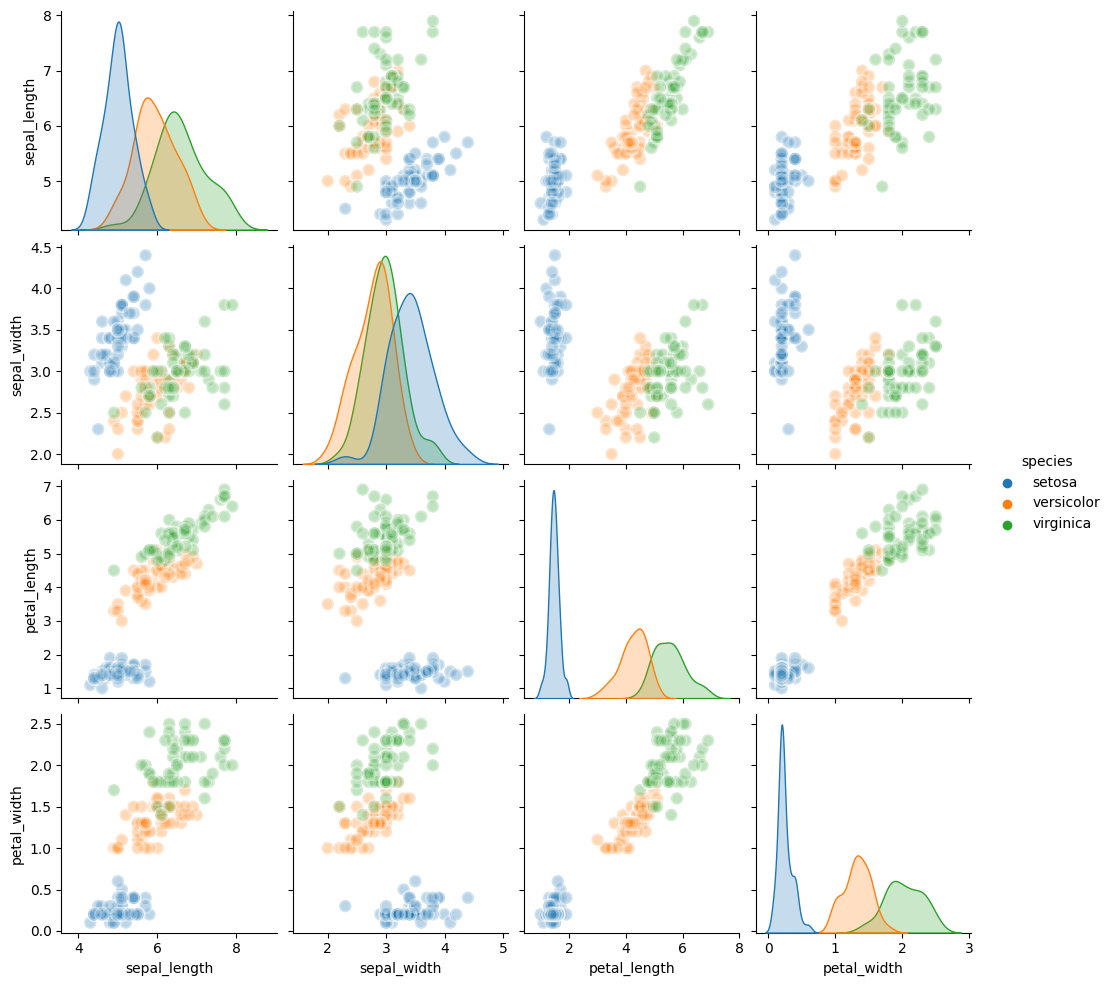

In [6]:
# marker 원, 사각형, 다이아몬드
sns.pairplot(df, 
             kind="scatter", 
             hue="species", 
             markers=["o", "s", "D"], 
             palette="Set2")
plt.show()
 
# scatter의 사이즈, 투명도, 가장자리 색, 두께
sns.pairplot(df, 
             kind="scatter", 
             hue="species", 
             plot_kws=dict(s=80, 
                           alpha=.3,
                           edgecolor="white", 
                           linewidth=2.5))
plt.show()

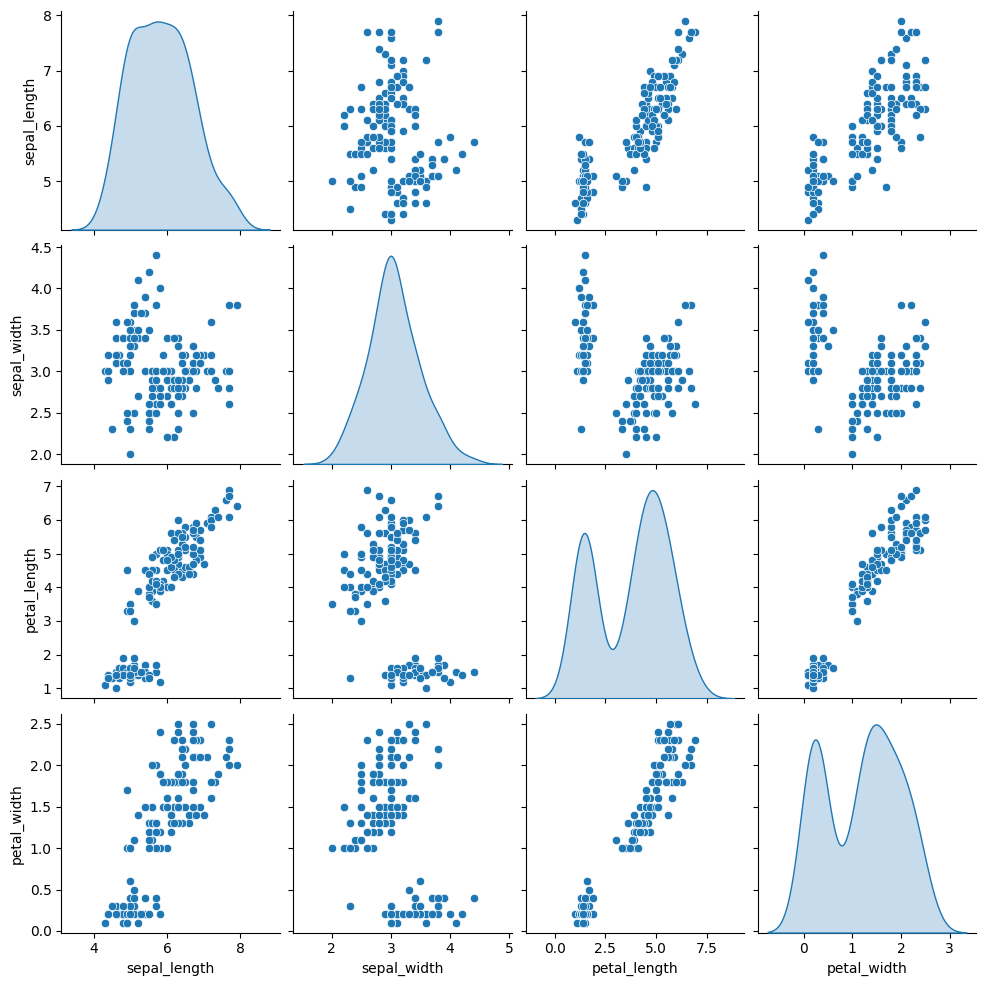

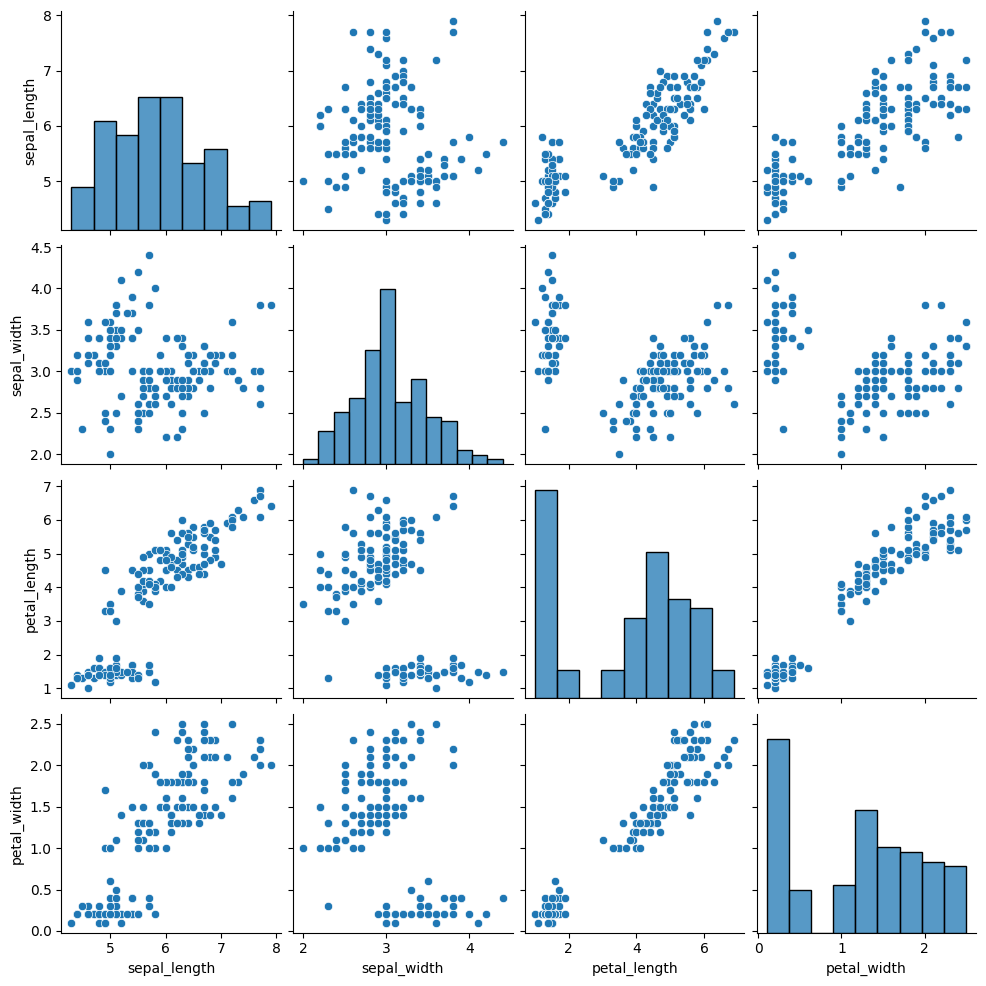

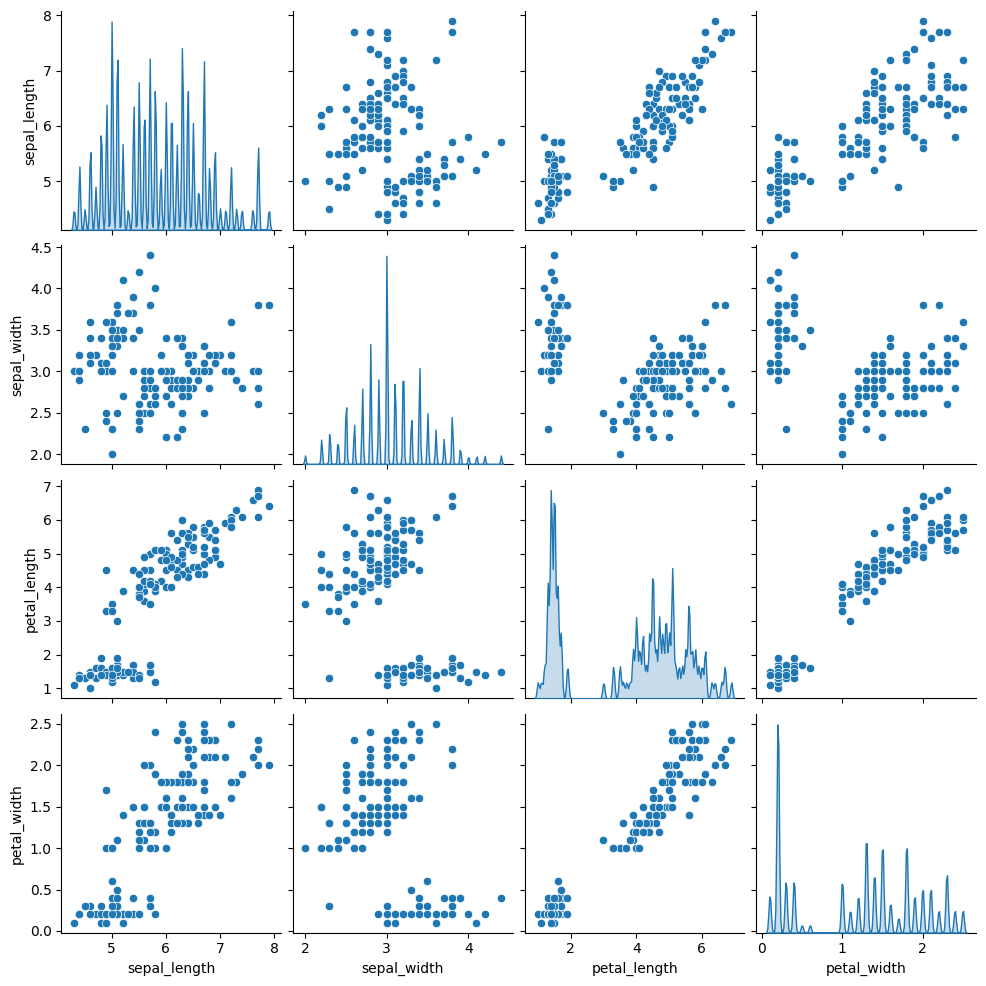

In [8]:
# Density
sns.pairplot(df, diag_kind="kde")
 
# Histogram
sns.pairplot(df, diag_kind="hist")
 
# bw 조정
sns.pairplot(df, 
             diag_kind="kde", 
             diag_kws=dict(bw_adjust=.05) )

plt.show()

In [9]:
import palmerpenguins

In [10]:
penguins = palmerpenguins.load_penguins().dropna()

In [11]:
COLUMNS = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
COLORS = ["#386cb0", "#fdb462", "#7fc97f"]
SPECIES = ["Adelie", "Gentoo", "Chinstrap"]

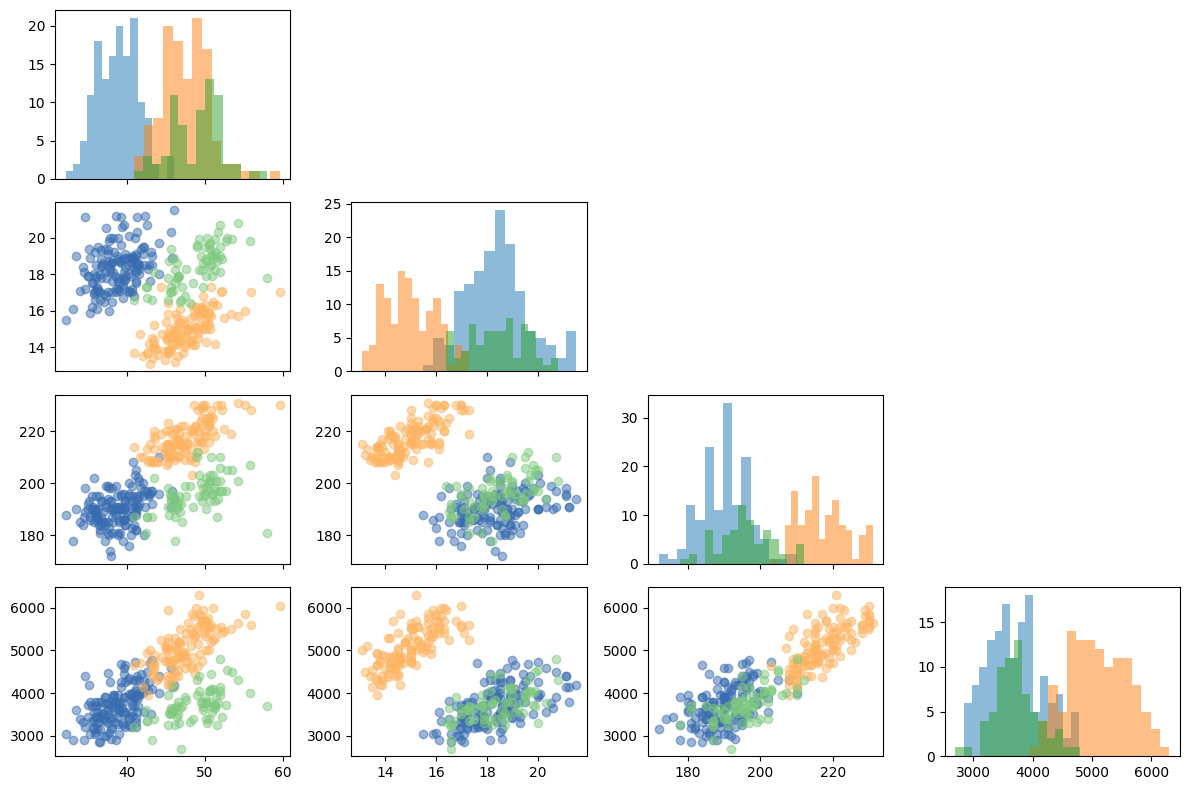

In [13]:
# 4x4 subplots 
fig, axes = plt.subplots(4, 4, figsize = (12, 8), sharex="col", tight_layout=True)

for i in range(len(COLUMNS)):
    for j in range(len(COLUMNS)):
        # 하삼각행렬일 때 scatterlpot
        if i > j:
            for species, color in zip(SPECIES, COLORS):
                data = penguins[penguins["species"] == species]
                axes[i, j].scatter(COLUMNS[j], COLUMNS[i], color=color, alpha=0.5, data=data)
                
        # 대각행렬일 때, histogram
        if i == j:
            for species, color in zip(SPECIES, COLORS):
                data = penguins[penguins["species"] == species]
                axes[i, j].hist(COLUMNS[j], bins=15, alpha=0.5, data=data)

for i in range(len(COLUMNS)):
    for j in range(len(COLUMNS)):
        # 상삼각행렬일 때, 지우기
        if i < j:
            axes[i, j].remove()
